<a href="https://colab.research.google.com/github/kamil3di/transfer_learning/blob/main/InceptionV3_TL_SUCCESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow as tfd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import tensorflow as tf
from keras.models import Model

In [ ]:
base_model = InceptionV3(weights='imagenet',include_top=False, input_shape = (299,299,3))

In [ ]:
len(base_model.layers)

311

In [ ]:
fine_tune_at = 230

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
x = Flatten()(base_model.output)

x = Dense(1024, activation='relu')(x)

x = Dropout(0.4)(x)

x = Dense(1024, activation='relu')(x)

x = Dense(1,activation='sigmoid')(x)

model = Model(inputs= base_model.input, outputs =x)

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
#Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
     "/content/drive/MyDrive/covid_19_data/train_data",
     target_size = (299,299),
     batch_size =32,
     class_mode ='binary')

validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/covid_19_data/test_data',
    target_size = (299,299),
    batch_size = 32,
    class_mode ='binary'
)

Found 1781 images belonging to 2 classes.
Found 760 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
hist = model.fit(
    train_generator,
    epochs = 5,
    validation_data = validation_generator,
)

Epoch 1/5
56/56 [==============================] - 796s 14s/step - loss: 10.5548 - accuracy: 0.8699 - val_loss: 15.0806 - val_accuracy: 0.9421
Epoch 2/5
56/56 [==============================] - 54s 969ms/step - loss: 0.1547 - accuracy: 0.9857 - val_loss: 0.6664 - val_accuracy: 0.9908
Epoch 3/5
56/56 [==============================] - 55s 979ms/step - loss: 0.0254 - accuracy: 0.9907 - val_loss: 0.2586 - val_accuracy: 0.9829
Epoch 4/5
56/56 [==============================] - 55s 978ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.0552 - val_accuracy: 0.9855
Epoch 5/5
56/56 [==============================] - 55s 974ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0498 - val_accuracy: 0.9908


In [ ]:
model.save("inception_v3_18_03.h5")

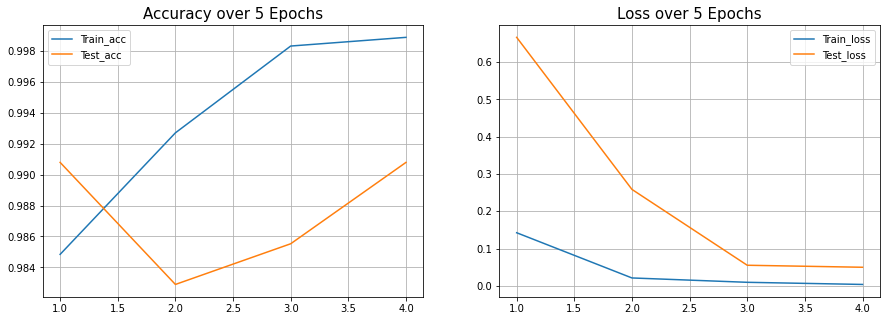

In [ ]:
import matplotlib.pyplot as plt
def plot_acc_loss(hist, epochs):
  acc = hist.history['accuracy']
  loss = hist.history['loss']
  val_acc = hist.history['val_accuracy']
  val_loss = hist.history['val_loss']
  plt.figure(figsize=(15, 5))
  plt.subplot(121)
  plt.plot(range(1,epochs), acc[1:], label='Train_acc')
  plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
  plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
  plt.legend()
  plt.grid(True)
  plt.subplot(122)
  plt.plot(range(1,epochs), loss[1:], label='Train_loss')
  plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
  plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
  plt.legend()
  plt.grid(True)
  plt.show()
 
plot_acc_loss(hist,5)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


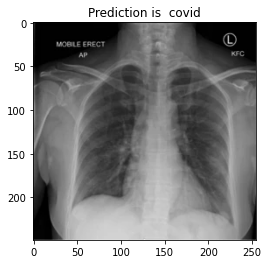

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

PATH = '/content/41591_2020_819_Fig1_HTML.webp-day10.png'

img=mpimg.imread(PATH)
imgplot = plt.imshow(img)

test_image = image.load_img(PATH, target_size = (299,299))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )
#There we will test this following image, COVID-19 positive

In [ ]:
denem_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/Val',
    target_size = (299,299),
    batch_size = 32,
    class_mode ='binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
score = model.evaluate(denem_generator)
print("First one:", score[0], "second one is:", score[1])

2/2 [==============================] - 11s 10s/step - loss: 0.0106 - accuracy: 1.0000
First one: 0.0105669554322958 second one is: 1.0


In [ ]:
trainv2_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/Train',
    target_size = (299,299),
    batch_size = 32,
    class_mode ='binary'
)

Found 288 images belonging to 2 classes.


In [ ]:
scorev2 = model.evaluate(trainv2_generator)
print("First one:", score[0], "second one is:", score[1])

9/9 [==============================] - 73s 9s/step - loss: 0.0202 - accuracy: 0.9931
First one: 0.0105669554322958 second one is: 1.0
